### 1. DNN을 통한 분류

#### ※ 앞으로 궁금할 상식: 분류 학습에서 왜 Cross Entropy를 사용할 때, output layer에 activation function을 안쓰는걸까?
* (Binary) Cross Entropy에 이미 activation(예: sigmoid, softmax)이 내재되어 있어, 1차로 output의 features(Not categorical)를 activation 해준 후에, 2차로 CE loss 계산

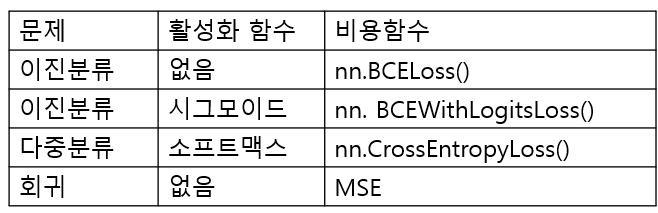

### 2. wine.csv 데이터셋 기반 DNN 이진분류

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('wine.csv')

# 화이트 와인(0)인지 레드와인(1)인지
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1) # 2차원으로 만들어야함. 모델 예측은 2차원으로 나오기 때문
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


class DNN(nn.Module):
    def __init__(self, input_dim):
        super(DNN, self).__init__()
        self.layer1 = nn.Linear(input_dim, 8)
        self.layer2 = nn.Linear(8, 16)
        self.layer3 = nn.Linear(16, 16)
        self.layer4 = nn.Linear(16, 8)
        self.layer5 = nn.Linear(8, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.relu(self.layer3(x))
        x = self.relu(self.layer4(x))
        x = self.layer5(x)
        return x

input_dim = X_train.shape[1]
model = DNN(input_dim)

criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    for X_batch, y_batch in train_loader:

        y_pred = model(X_batch)

        loss = criterion(y_pred, y_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}')

model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for X_batch, y_batch in test_loader:
        y_pred = model(X_batch)
        y_pred = torch.sigmoid(y_pred) # 시그모이드를 통과해서 확률값 구함
        y_pred = (y_pred > 0.5).float()
        correct += (y_pred == y_batch).sum().item()
        total += y_batch.size(0)

    accuracy = correct / total
    print(f'Accuracy: {accuracy:.4f}')


Epoch 1/10, Loss: 0.0722
Epoch 2/10, Loss: 0.1342
Epoch 3/10, Loss: 0.0167
Epoch 4/10, Loss: 0.0266
Epoch 5/10, Loss: 0.0045
Epoch 6/10, Loss: 0.0111
Epoch 7/10, Loss: 0.0039
Epoch 8/10, Loss: 0.0046
Epoch 9/10, Loss: 0.0054
Epoch 10/10, Loss: 0.0381
Accuracy: 0.9977


### 실습) wine.csv 데이터셋 기반 DNN 이진분류를 누군가 코드를 망쳐놨다. 고쳐보자

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('wine.csv')

# 화이트 와인(0)인지 레드와인(1)인지
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1) # 2차원으로 만들어야함. 모델 예측은 2차원으로 나오기 때문
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


class DNN(nn.Module):
    def __init__(self, input_dim):
        super(DNN, self).__init__()
        self.layer1 = nn.Linear(input_dim, 8)
        self.layer2 = nn.Linear(8, 16)
        self.layer3 = nn.Linear(16, 16)
        self.layer4 = nn.Linear(16, 8)
        self.layer5 = nn.Linear(8, 1)  # 수정
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.relu(self.layer3(x))
        x = self.relu(self.layer4(x))
        x = self.layer5(x)
        return x

input_dim = X_train.shape[1]
model = DNN(input_dim)

criterion = nn.BCEWithLogitsLoss() # 수정
optimizer = optim.Adam(model.parameters(), lr=0.001)


num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    for X_batch, y_batch in train_loader:

        y_pred = model(X_batch)

        loss = criterion(y_pred, y_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}')

model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for X_batch, y_batch in test_loader:
        y_pred = model(X_batch)
        y_pred = torch.sigmoid(y_pred) # 시그모이드를 통과해서 확률값 구함
        y_pred = (y_pred > 0.5).float() #수정
        correct += (y_pred == y_batch).sum().item() #수정
        total += y_batch.size(0)

    accuracy = correct / total # 수정
    print(f'Accuracy: {accuracy:.4f}')

Epoch 1/10, Loss: 0.0464
Epoch 2/10, Loss: 0.0106
Epoch 3/10, Loss: 0.0056
Epoch 4/10, Loss: 0.0074
Epoch 5/10, Loss: 0.0058
Epoch 6/10, Loss: 0.0987
Epoch 7/10, Loss: 0.2702
Epoch 8/10, Loss: 0.0040
Epoch 9/10, Loss: 0.0052
Epoch 10/10, Loss: 0.0032
Accuracy: 0.9969


### 3. wine.csv 데이터셋 기반 DNN 이진분류

1). accracy

2). f1_score

3). confusion matrix

4). precision

5). recall

을 출력해보자

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score

df = pd.read_csv('wine.csv')

# 화이트 와인(0)인지 레드와인(1)인지
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1) # 2차원으로 만들어야함. 모델 예측은 2차원으로 나오기 때문
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

class DNN(nn.Module):
    def __init__(self, input_dim):
        super(DNN, self).__init__()
        self.layer1 = nn.Linear(input_dim, 8)
        self.layer2 = nn.Linear(8, 16)
        self.layer3 = nn.Linear(16, 16)
        self.layer4 = nn.Linear(16, 8)
        self.layer5 = nn.Linear(8, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.relu(self.layer3(x))
        x = self.relu(self.layer4(x))
        x = self.layer5(x)
        return x

input_dim = X_train.shape[1]
model = DNN(input_dim)

criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    for X_batch, y_batch in train_loader:

        y_pred = model(X_batch)

        loss = criterion(y_pred, y_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}')

model.eval()
with torch.no_grad():
    y_preds = []
    y_trues = []
    for X_batch, y_batch in test_loader:
        y_pred = model(X_batch)
        y_pred = torch.sigmoid(y_pred)  # 시그모이드를 통과해서 확률값 구함
        y_pred = (y_pred > 0.5).float()  # 0.5를 기준으로 이진화
        y_preds.extend(y_pred.view(-1).tolist())
        y_trues.extend(y_batch.view(-1).tolist())

    # 성능 지표 계산
    accuracy = accuracy_score(y_trues, y_preds)
    f1 = f1_score(y_trues, y_preds)
    cm = confusion_matrix(y_trues, y_preds)
    precision = precision_score(y_trues, y_preds)
    recall = recall_score(y_trues, y_preds)

    # 결과 출력
    print(f'Accuracy: {accuracy:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print(f'Confusion Matrix:\n{cm}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')


Epoch 1/10, Loss: 0.0397
Epoch 2/10, Loss: 0.0018
Epoch 3/10, Loss: 0.0048
Epoch 4/10, Loss: 0.0016
Epoch 5/10, Loss: 0.3333
Epoch 6/10, Loss: 0.0050
Epoch 7/10, Loss: 0.0020
Epoch 8/10, Loss: 0.0111
Epoch 9/10, Loss: 0.0023
Epoch 10/10, Loss: 0.0038
Accuracy: 0.9977
F1 Score: 0.9953
Confusion Matrix:
[[980   0]
 [  3 317]]
Precision: 1.0000
Recall: 0.9906


### 4. wine.csv 데이터셋 기반 DNN 이진분류 - 클래스 불균형 해결

SMOTE를 사용해보자

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score

df = pd.read_csv('wine.csv')
df['class'].value_counts()

,count
class,
0,4898
1,1599


In [3]:
from imblearn.over_sampling import SMOTE

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values   # 화이트 와인: 0, 레드 와인: 1

# 데이터셋 분리 (훈련 및 테스트 셋)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# SMOTE 적용
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# SMOTE 적용 후 클래스 분포 확인
print(f"After SMOTE: \n{pd.Series(y_train_resampled).value_counts()}")

After SMOTE: 
0    3918
1    3918
Name: count, dtype: int64


In [4]:
# 데이터 정규화
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# 데이터를 텐서로 변환
X_train_tensor = torch.tensor(X_train_resampled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_resampled, dtype=torch.float32).unsqueeze(1)  # 2차원으로 변환
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

# 데이터셋과 데이터로더 준비
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# DNN 모델 정의
class DNN(nn.Module):
    def __init__(self, input_dim):
        super(DNN, self).__init__()
        self.layer1 = nn.Linear(input_dim, 8)
        self.layer2 = nn.Linear(8, 16)
        self.layer3 = nn.Linear(16, 16)
        self.layer4 = nn.Linear(16, 8)
        self.layer5 = nn.Linear(8, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.relu(self.layer3(x))
        x = self.relu(self.layer4(x))
        x = self.layer5(x)
        return x

input_dim = X_train.shape[1]
model = DNN(input_dim)

# 손실 함수 및 옵티마이저 정의
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 모델 학습
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    for X_batch, y_batch in train_loader:

        y_pred = model(X_batch)

        loss = criterion(y_pred, y_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}')

# 모델 평가
model.eval()
with torch.no_grad():
    y_preds = []
    y_trues = []
    for X_batch, y_batch in test_loader:
        y_pred = model(X_batch)
        y_pred = torch.sigmoid(y_pred)  # 시그모이드를 통과해서 확률값 구함
        y_pred = (y_pred > 0.5).float()  # 0.5를 기준으로 이진화
        y_preds.extend(y_pred.view(-1).tolist())
        y_trues.extend(y_batch.view(-1).tolist())

    # 성능 지표 계산
    accuracy = accuracy_score(y_trues, y_preds)
    f1 = f1_score(y_trues, y_preds)
    cm = confusion_matrix(y_trues, y_preds)
    precision = precision_score(y_trues, y_preds)
    recall = recall_score(y_trues, y_preds)

    # 결과 출력
    print(f'Accuracy: {accuracy:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print(f'Confusion Matrix:\n{cm}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')

Epoch 1/10, Loss: 0.0087
Epoch 2/10, Loss: 0.0116
Epoch 3/10, Loss: 0.0096
Epoch 4/10, Loss: 0.1308
Epoch 5/10, Loss: 0.0023
Epoch 6/10, Loss: 0.0091
Epoch 7/10, Loss: 0.0097
Epoch 8/10, Loss: 0.0053
Epoch 9/10, Loss: 0.0029
Epoch 10/10, Loss: 0.0031
Accuracy: 0.9977
F1 Score: 0.9953
Confusion Matrix:
[[980   0]
 [  3 317]]
Precision: 1.0000
Recall: 0.9906


### 같이해보는 실습) 타이타닉 데이터셋으로 MLP 모델을 이용하여 생존분류를 해보자  

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

df = pd.read_csv('titanic.csv')
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked']]
df.dropna(inplace=True)
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])
df['Embarked'] = LabelEncoder().fit_transform(df['Embarked'])

X = df.drop('Survived', axis=1).values
y = df['Survived'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

class MLP(nn.Module):
    def __init__(self, input_dim):
        super(MLP, self).__init__()
        self.layer1 = nn.Linear(input_dim, 64)
        self.layer2 = nn.Linear(64, 32)
        self.layer3 = nn.Linear(32, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.sigmoid(self.layer3(x))
        return x

input_dim = X_train.shape[1]
model = MLP(input_dim)

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    for X_batch, y_batch in train_loader:
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}')

model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for X_batch, y_batch in test_loader:
        y_pred = model(X_batch)
        y_pred = (y_pred > 0.5).float()
        correct += (y_pred == y_batch).sum().item()
        total += y_batch.size(0)

    accuracy = correct / total
    print(f'Accuracy: {accuracy:.4f}')


### 5. 타이타닉 데이터셋으로 MLP 모델을 이용하여 생존분류를 해보자 - 클래스 불균형 해결

SMOTENC를 사용해보자

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE, SMOTENC

# 데이터 로드 및 전처리
df = pd.read_csv('titanic.csv')
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked']]
df.dropna(inplace=True)

# 각 클래스가 몇개인지 보자
print(df['Survived'].value_counts())

Survived
0    424
1    288
Name: count, dtype: int64


In [ ]:
# 범주형 변수 인코딩
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])
df['Embarked'] = LabelEncoder().fit_transform(df['Embarked'])

X = df.drop('Survived', axis=1).values
y = df['Survived'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 범주형 변수 인덱스 (Pclass, Sex, Embarked)
categorical_features = [0, 1, 4]

# SMOTE-NC 적용
smote_nc = SMOTENC(categorical_features=categorical_features, random_state=42)
X_train_resampled, y_train_resampled = smote_nc.fit_resample(X_train, y_train)

# 정규화
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# 텐서변환
X_train_tensor = torch.tensor(X_train_resampled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_resampled, dtype=torch.float32).unsqueeze(1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# MLP 모델 정의
class MLP(nn.Module):
    def __init__(self, input_dim):
        super(MLP, self).__init__()
        self.layer1 = nn.Linear(input_dim, 64)
        self.layer2 = nn.Linear(64, 32)
        self.layer3 = nn.Linear(32, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.sigmoid(self.layer3(x))
        return x

input_dim = X_train.shape[1]
model = MLP(input_dim)

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 모델 학습
num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    for X_batch, y_batch in train_loader:
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}')

# 모델 평가
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for X_batch, y_batch in test_loader:
        y_pred = model(X_batch)
        y_pred = (y_pred > 0.5).float()
        correct += (y_pred == y_batch).sum().item()
        total += y_batch.size(0)

    accuracy = correct / total


### 3. iris.csv 데이터셋 기반 MLP 다중분류

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import accuracy_score

df = pd.read_csv('iris.csv')
df['variety'] = LabelEncoder().fit_transform(df['variety'])

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

'''
# 방법 1: nn.Sequential()과 add_module 사용

model = nn.Sequential()
model.add_module('fc1', nn.Linear(41, 100))
model.add_module('relu1', nn.ReLU())
model.add_module('fc2', nn.Linear(100, 100))
model.add_module('relu2', nn.ReLU())
model.add_module('fc3', nn.Linear(100, 3))

# 방법 2: nn.Sequential() 안에 직접 레이어 정의
model = nn.Sequential(
     nn.Linear(28*28*1, 100),  # input_layer = 784, hidden_layer1 = 100
     nn.ReLU(),
     nn.Linear(100, 100),  # hidden_layer2 = 100, hidden_layer3 = 100
     nn.ReLU(),
     nn.Linear(100, 10)  # hidden_layer3 = 100, output_layer = 10
     )
'''
# 방법 3: nn.Module을 상속하는 클래스 정의    #강사님 추천 픽
class MultiLayerRegression(nn.Module):
    def __init__(self):
        super(MultiLayerRegression, self).__init__() #x_train이 데이터 x 피처갯수의 shape을 가지는데 거기서 인덱스 1(피처갯수)
        self.linear1 = nn.Linear(X_train.shape[1], 100)  # input_layer = X_train.shape[1], hidden_layer1 = 100
        self.activate1 = nn.ReLU()
        self.linear2 = nn.Linear(100, 100)  # hidden_layer2 = 100, hidden_layer3 = 100
        self.activate2 = nn.ReLU() #범주형 정답값에서 유니크 셋 즉, 버시컬리, 세토사, 버지니카, 그거의 길이
        self.linear3 = nn.Linear(100, len(set(y)))  # hidden_layer3 = 100, output_layer = len(set(y))

    def forward(self, x):
        out1 = self.linear1(x)
        out2 = self.activate1(out1)
        out3 = self.linear2(out2)
        out4 = self.activate2(out3)
        out5 = self.linear3(out4)
        return out5

model = MultiLayerRegression()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

patience = 5
best_loss = float('inf')
early_stop_counter = 0

num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    for X_batch, y_batch in train_loader:
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch)
            val_loss += loss.item()

    val_loss /= len(test_loader)
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}, Val Loss: {val_loss:.4f}')

    if val_loss < best_loss:
        best_loss = val_loss
        early_stop_counter = 0
    else:
        early_stop_counter += 1

    if early_stop_counter >= patience:
        print("Early stopping triggered")
        break

model.eval()
with torch.no_grad():
    y_pred = []
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch)
        _, predicted = torch.max(outputs, 1)
        y_pred.extend(predicted.numpy())

    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.4f}')


Epoch 1/50, Loss: 0.8993, Val Loss: 0.8993
Epoch 2/50, Loss: 0.7730, Val Loss: 0.7730
Epoch 3/50, Loss: 0.6666, Val Loss: 0.6666
Epoch 4/50, Loss: 0.5790, Val Loss: 0.5790
Epoch 5/50, Loss: 0.5085, Val Loss: 0.5085
Epoch 6/50, Loss: 0.4525, Val Loss: 0.4525
Epoch 7/50, Loss: 0.4052, Val Loss: 0.4052
Epoch 8/50, Loss: 0.3678, Val Loss: 0.3678
Epoch 9/50, Loss: 0.3364, Val Loss: 0.3364
Epoch 10/50, Loss: 0.3112, Val Loss: 0.3112
Epoch 11/50, Loss: 0.2884, Val Loss: 0.2884
Epoch 12/50, Loss: 0.2685, Val Loss: 0.2685
Epoch 13/50, Loss: 0.2518, Val Loss: 0.2518
Epoch 14/50, Loss: 0.2372, Val Loss: 0.2372
Epoch 15/50, Loss: 0.2208, Val Loss: 0.2208
Epoch 16/50, Loss: 0.2057, Val Loss: 0.2057
Epoch 17/50, Loss: 0.1932, Val Loss: 0.1932
Epoch 18/50, Loss: 0.1806, Val Loss: 0.1806
Epoch 19/50, Loss: 0.1684, Val Loss: 0.1684
Epoch 20/50, Loss: 0.1580, Val Loss: 0.1580
Epoch 21/50, Loss: 0.1488, Val Loss: 0.1488
Epoch 22/50, Loss: 0.1406, Val Loss: 0.1406
Epoch 23/50, Loss: 0.1339, Val Loss: 0.13

# ★ 실무 실습) 배포 받은 "신용카드 사용자 연체 예측"를 통해 자신만의 코드를 작성 해보자

[사람의 정보를 넣어서 신용을 분류예측 하는 모델을 만들어 보자!]

1. credit: 사용자의 신용카드 대금 연체를 기준으로 한 신용도 (0,1,2)=> 낮을 수록 높은 신용의 신용카드 사용자를 의미함

2. 하나의 포트폴리오가 될 수 있도록 시각화와 통계를 자유롭게 작성해보자.
3. 이제까지 배운 분류 방법들을 통해 적용해보자.
4. 모든 기법을 다 쓰는 것보다는 필요 할 것 같다는 코드만 작성해보기

In [15]:
df = pd.read_csv('/content/train.csv')
df

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,26452,F,N,N,2,225000.0,State servant,Secondary / secondary special,Married,House / apartment,-12079,-1984,1,0,0,0,Core staff,4.0,-2.0,1.0
26453,26453,F,N,Y,1,180000.0,Working,Higher education,Separated,House / apartment,-15291,-2475,1,0,0,0,NaN,2.0,-47.0,2.0
26454,26454,F,Y,N,0,292500.0,Working,Secondary / secondary special,Civil marriage,With parents,-10082,-2015,1,0,0,0,Core staff,2.0,-25.0,2.0
26455,26455,M,N,Y,0,171000.0,Working,Incomplete higher,Single / not married,House / apartment,-10145,-107,1,0,0,0,Laborers,1.0,-59.0,2.0


In [49]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [39]:
print(df.info())

print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

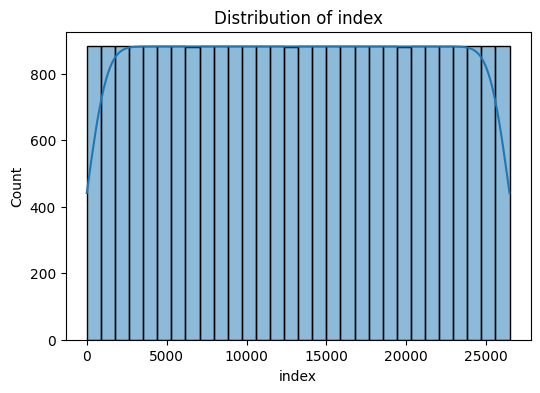

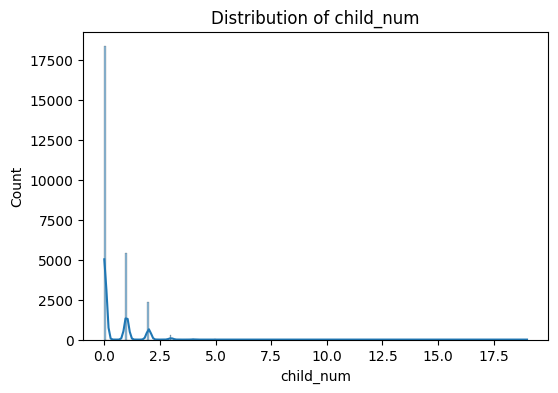

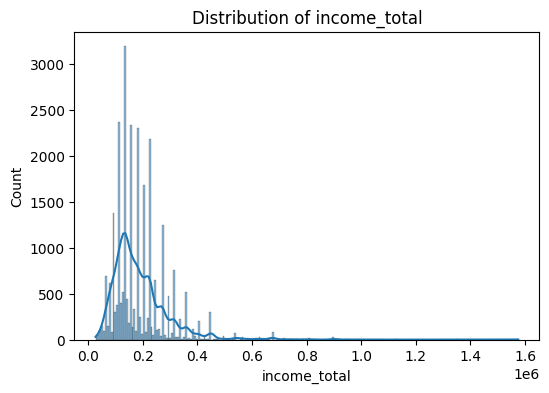

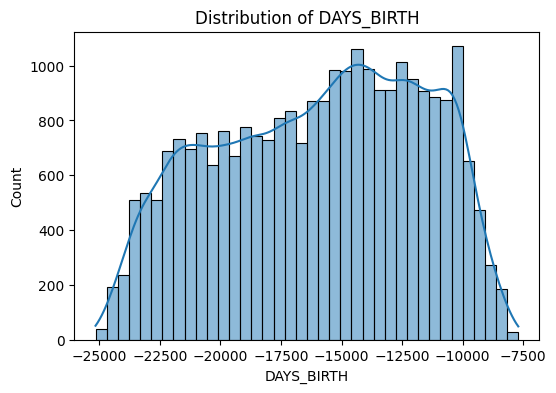

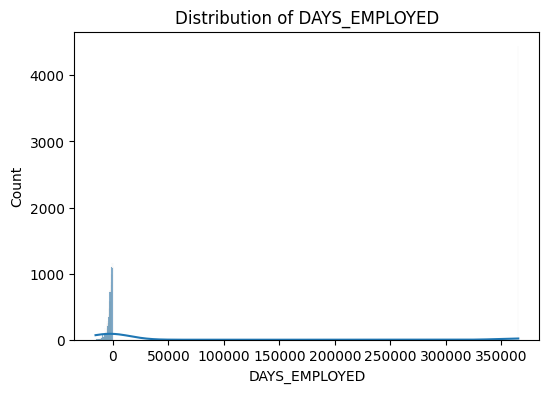

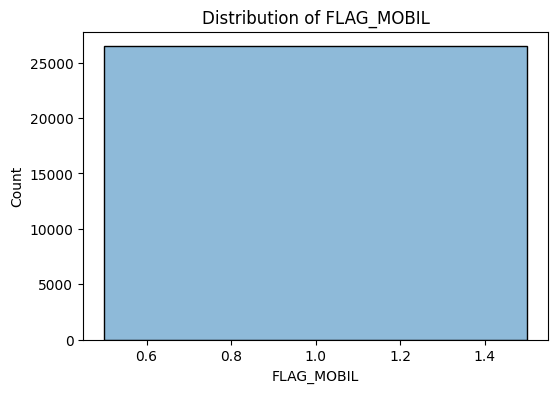

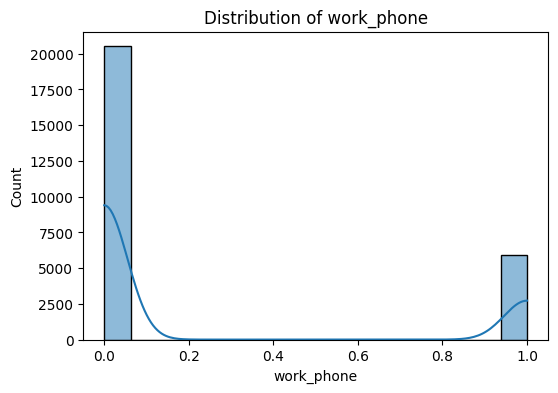

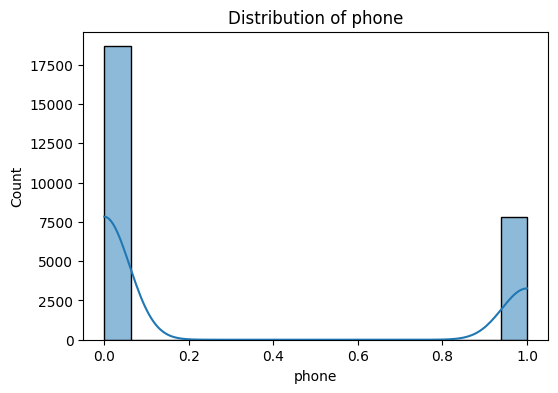

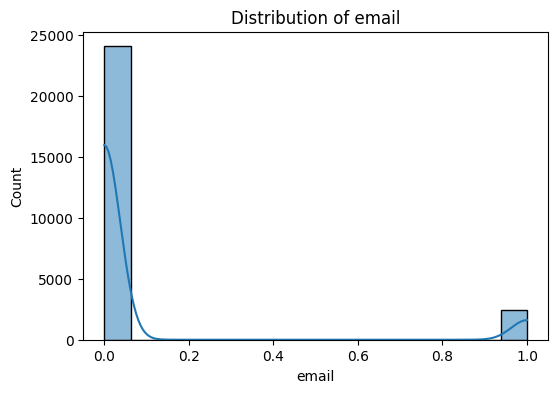

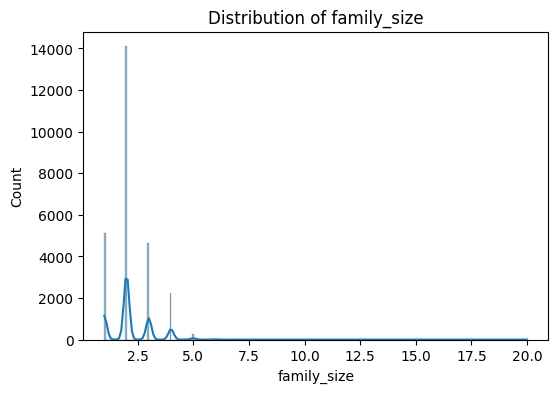

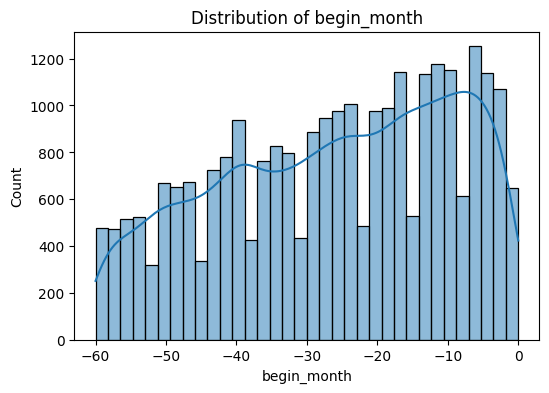

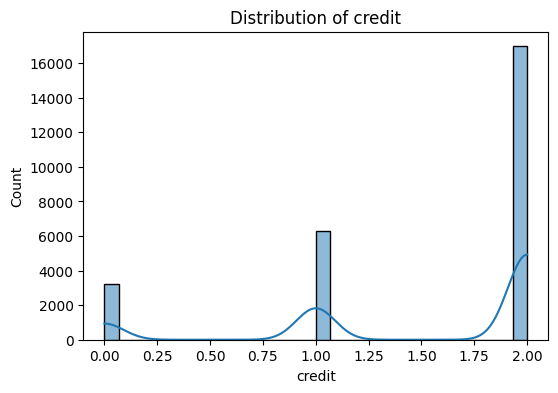

In [40]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

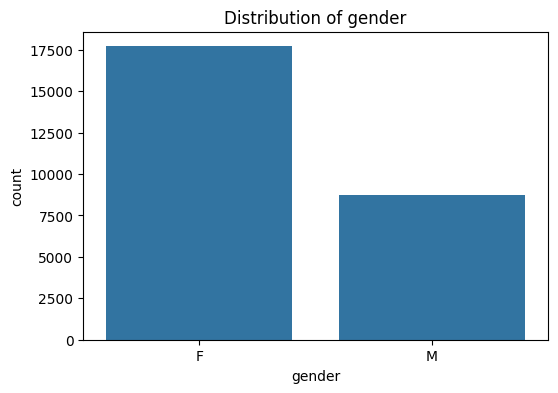

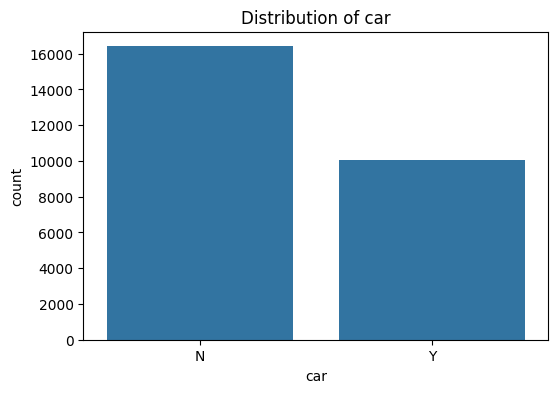

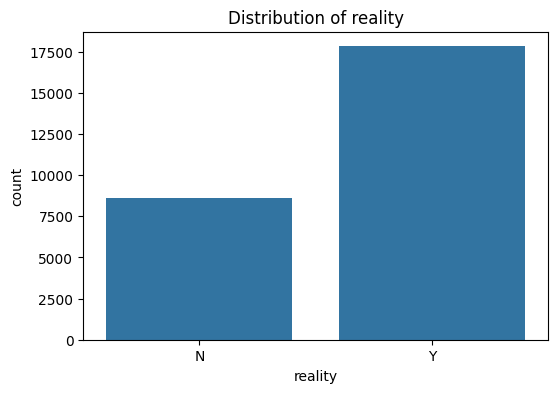

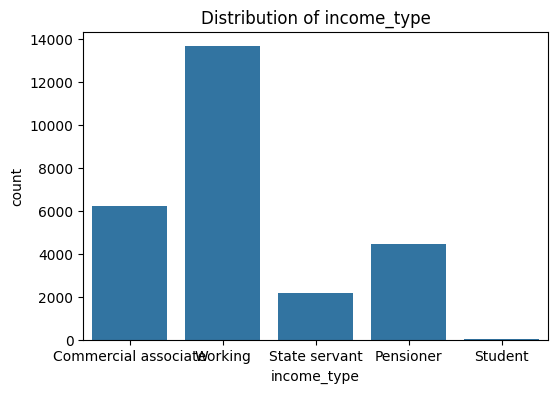

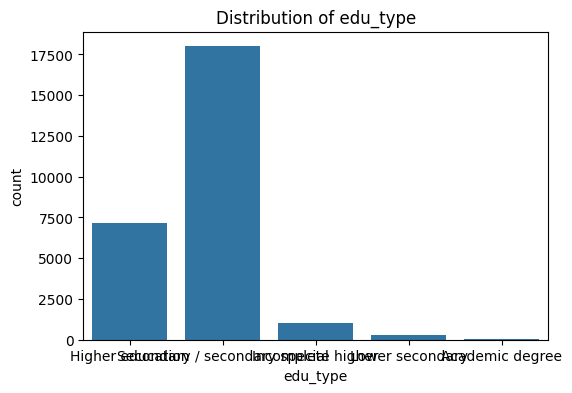

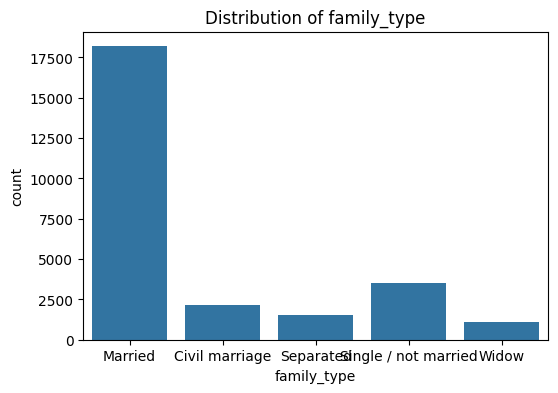

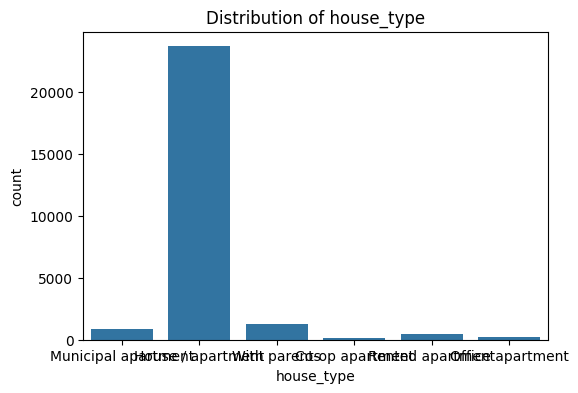

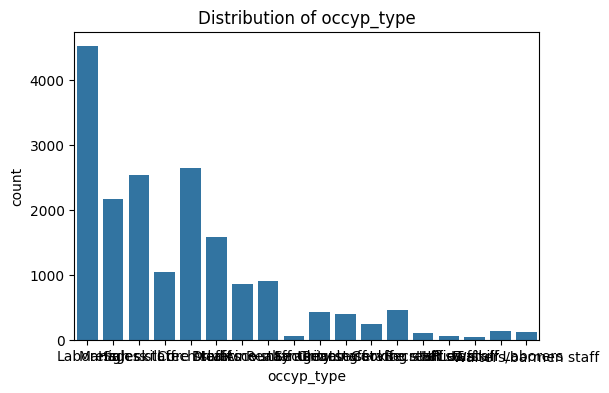

In [41]:
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.show()

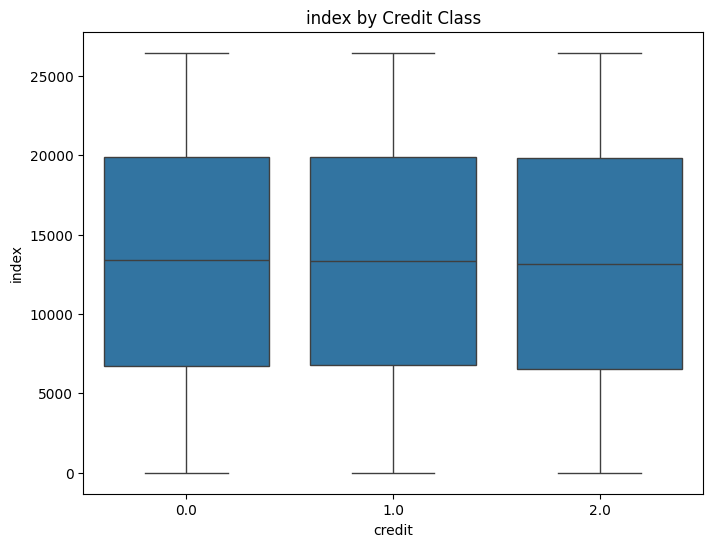

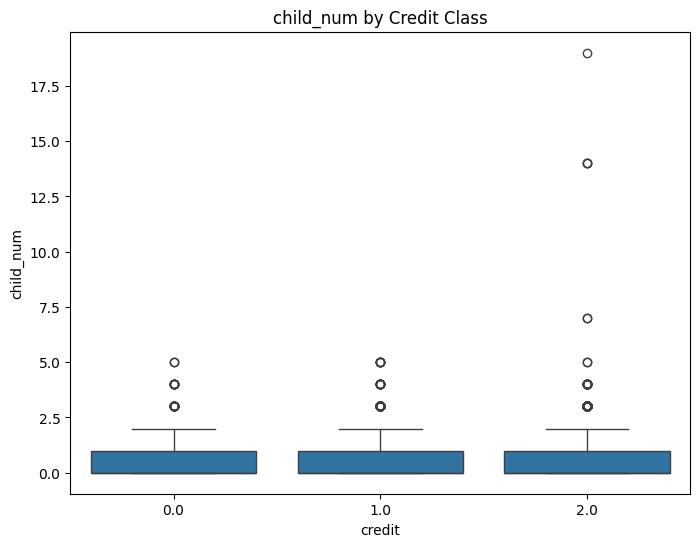

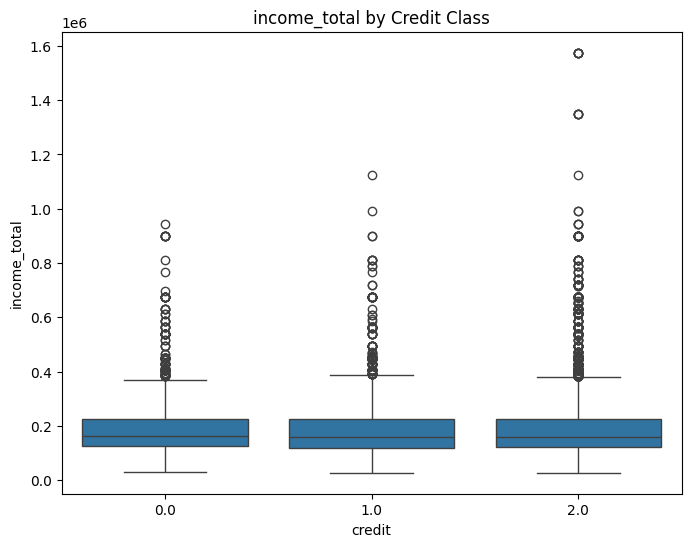

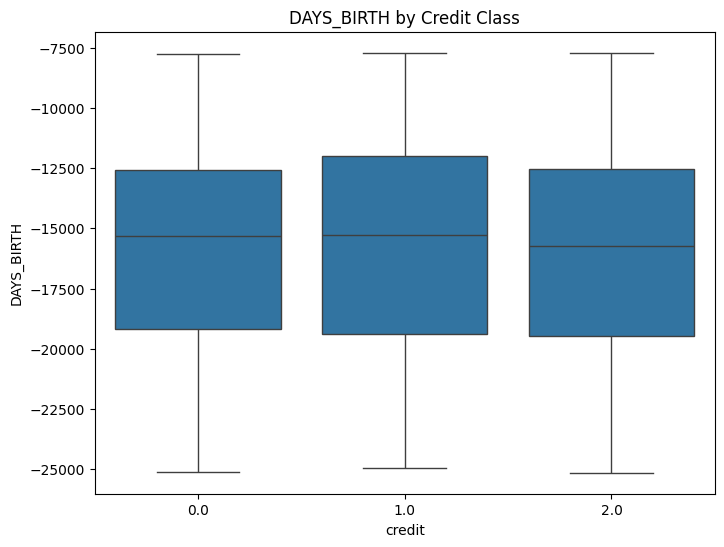

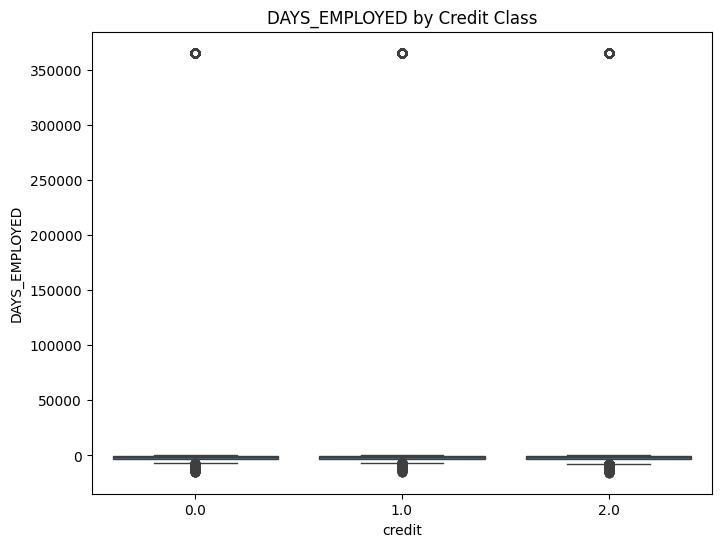

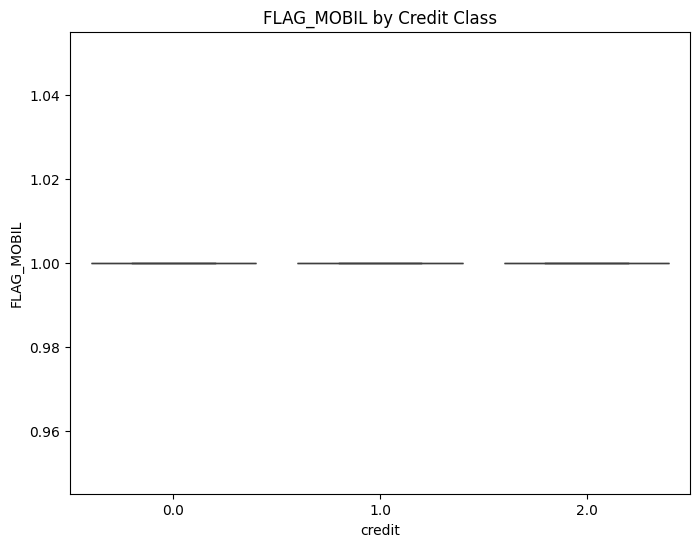

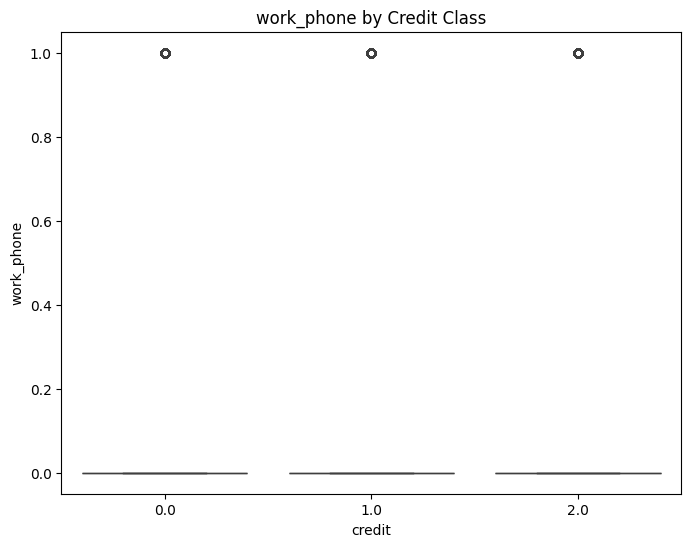

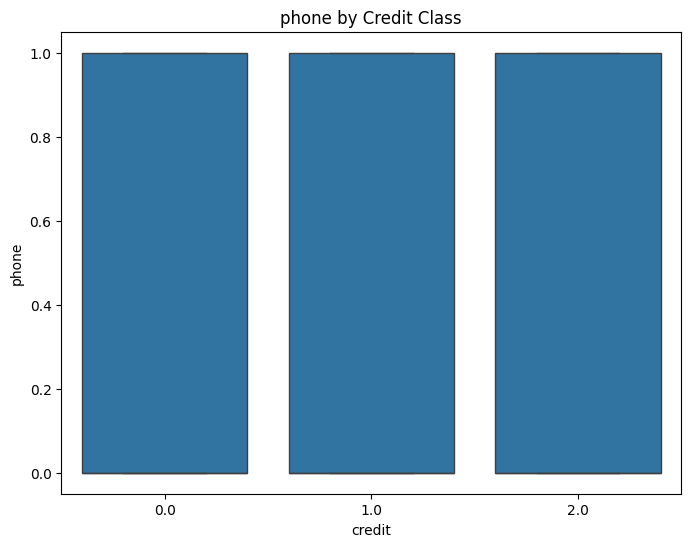

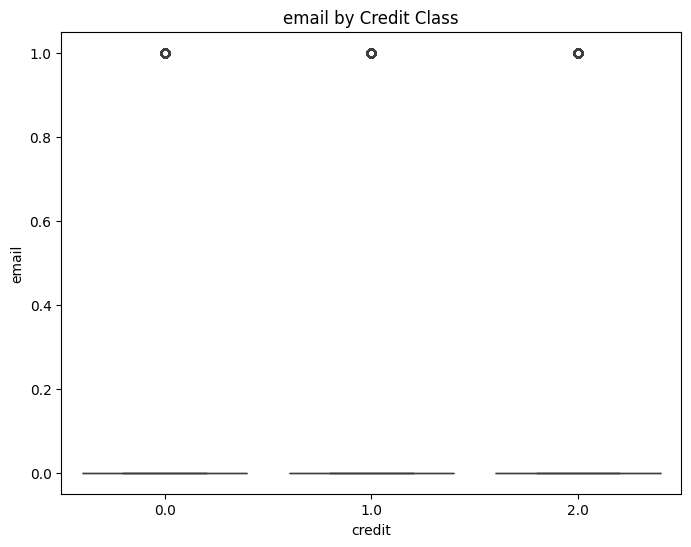

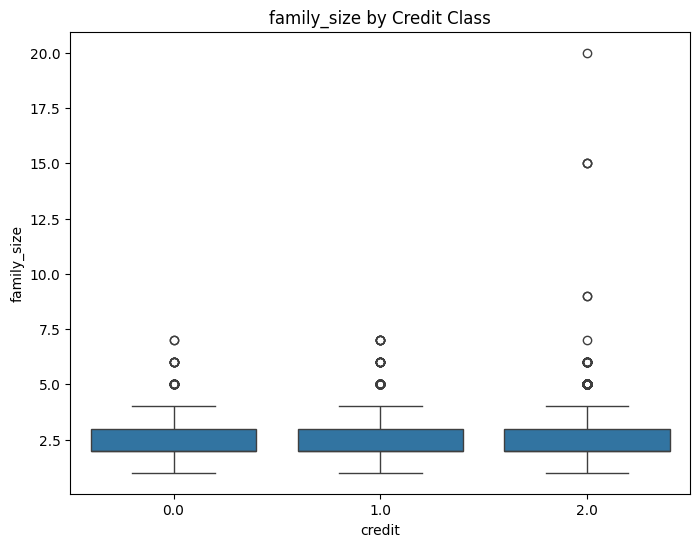

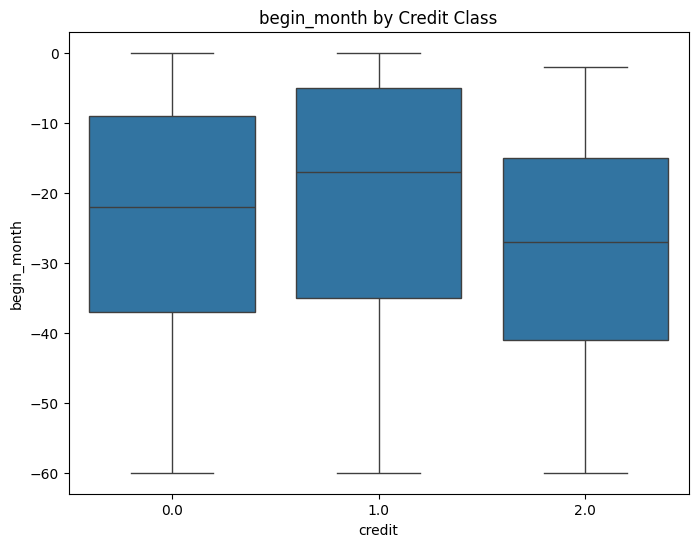

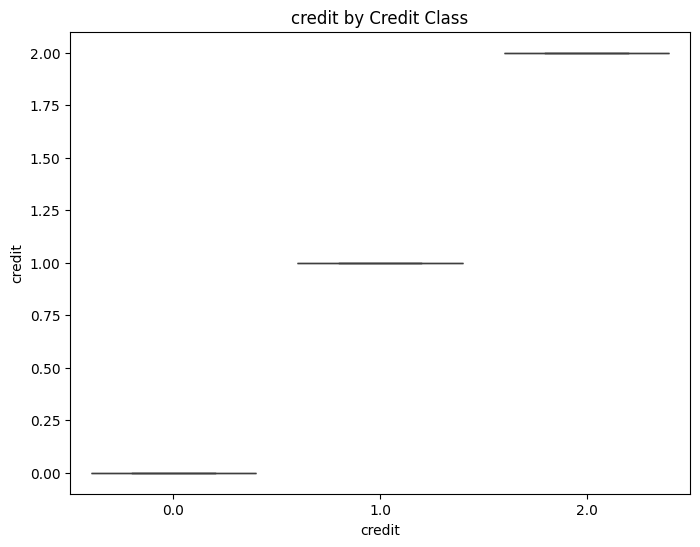

In [42]:
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='credit', y=col, data=df)
    plt.title(f'{col} by Credit Class')
    plt.show()

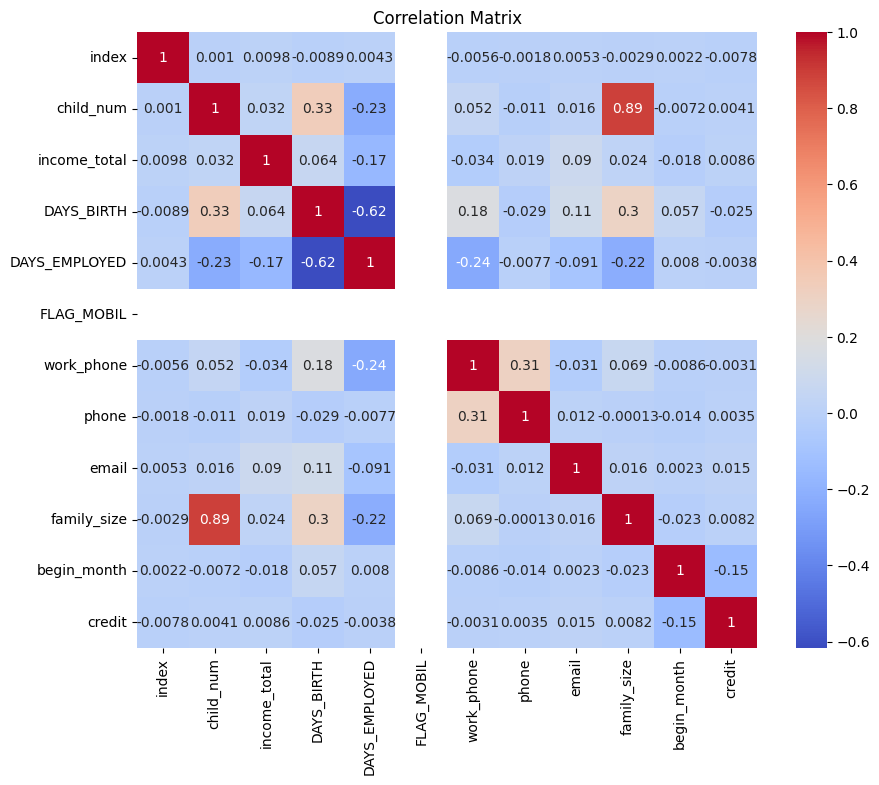

In [23]:
df_numeric = df.select_dtypes(include=['float64', 'int64'])

corr = df_numeric.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [30]:
from sklearn.preprocessing import OneHotEncoder
categorical_cols = df.select_dtypes(include=['object']).columns
onehot_encoder = OneHotEncoder(sparse=False, drop='first')

X_categorical = onehot_encoder.fit_transform(df[categorical_cols])
X_numeric = df.select_dtypes(include=['float64', 'int64']).drop(columns=['credit'])  # 'credit' 열을 제거

X = np.hstack([X_numeric, X_categorical])
y = df['credit'].values

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [50]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

X = np.hstack([X, df[['cluster']].values])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [51]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

In [53]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [54]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

In [55]:
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [56]:
class MLP(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(MLP, self).__init__()
        self.layer1 = nn.Linear(input_dim, 64)
        self.layer2 = nn.Linear(64, 32)
        self.layer3 = nn.Linear(32, output_dim)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.softmax(self.layer3(x))
        return x

input_dim = X_train.shape[1]
output_dim = len(set(y_train))

model = MLP(input_dim, output_dim)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [61]:
model.eval()
y_pred = []
y_true = []
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch)
        _, predicted = torch.max(outputs, 1)
        y_pred.extend(predicted.cpu().numpy())
        y_true.extend(y_batch.cpu().numpy())

In [62]:
num_epochs = 50
patience = 5
best_loss = float('inf')
early_stop_counter = 0

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    avg_train_loss = running_loss / len(train_loader)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_train_loss:.4f}')

    if avg_train_loss < best_loss:
        best_loss = avg_train_loss
        early_stop_counter = 0
        best_model_state = model.state_dict()
    else:
        early_stop_counter += 1

    if early_stop_counter >= patience:
        print(f"Early stopping at epoch {epoch+1}")
        break

model.load_state_dict(best_model_state)
print(f"Training completed. Best loss: {best_loss:.4f}")

accuracy = accuracy_score(y_true, y_pred)

print(f'Accuracy: {accuracy:.4f}')

Epoch [1/50], Loss: 0.8361
Epoch [2/50], Loss: 0.8358
Epoch [3/50], Loss: 0.8352
Epoch [4/50], Loss: 0.8355
Epoch [5/50], Loss: 0.8338
Epoch [6/50], Loss: 0.8344
Epoch [7/50], Loss: 0.8330
Epoch [8/50], Loss: 0.8321
Epoch [9/50], Loss: 0.8303
Epoch [10/50], Loss: 0.8306
Epoch [11/50], Loss: 0.8311
Epoch [12/50], Loss: 0.8297
Epoch [13/50], Loss: 0.8291
Epoch [14/50], Loss: 0.8283
Epoch [15/50], Loss: 0.8255
Epoch [16/50], Loss: 0.8283
Epoch [17/50], Loss: 0.8261
Epoch [18/50], Loss: 0.8253
Epoch [19/50], Loss: 0.8273
Epoch [20/50], Loss: 0.8244
Epoch [21/50], Loss: 0.8243
Epoch [22/50], Loss: 0.8243
Epoch [23/50], Loss: 0.8241
Epoch [24/50], Loss: 0.8228
Epoch [25/50], Loss: 0.8240
Epoch [26/50], Loss: 0.8226
Epoch [27/50], Loss: 0.8208
Epoch [28/50], Loss: 0.8208
Epoch [29/50], Loss: 0.8228
Epoch [30/50], Loss: 0.8216
Epoch [31/50], Loss: 0.8220
Epoch [32/50], Loss: 0.8225
Epoch [33/50], Loss: 0.8212
Early stopping at epoch 33
Training completed. Best loss: 0.8208
Accuracy: 0.6428


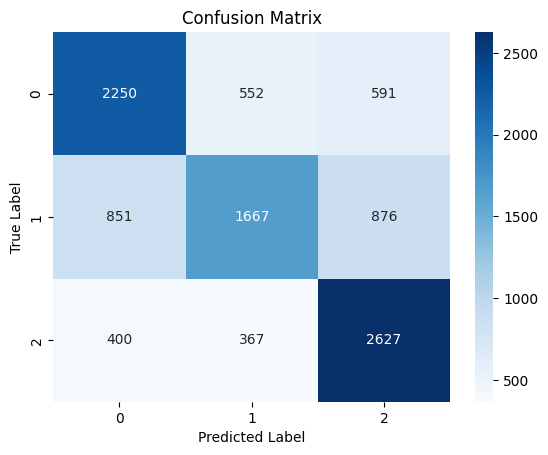

In [60]:
conf_matrix = confusion_matrix(y_true, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

### 4. 깃허브 울렁증 격파하기

스토리: 누군가 나에게 분류에는 어떤 모델이 좋다고 써보라고 했다. 그 모델이 뭔진 모르겠다. 그럼에도 불구하고 갖다 써보자

### 1) TabNet 스크립트 버전

---
https://github.com/huangyz0918/tabnet

In [63]:
!git clone https://github.com/huangyz0918/tabnet

Cloning into 'tabnet'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 33 (delta 11), reused 19 (delta 5), pack-reused 0 (from 0)
Receiving objects: 100% (33/33), 10.74 MiB | 15.03 MiB/s, done.
Resolving deltas: 100% (11/11), done.


In [64]:
%cd tabnet

/content/tabnet


In [65]:
!pwd

/content/tabnet


In [66]:
!python main.py

Traceback (most recent call last):
  File "/content/tabnet/main.py", line 2, in <module>
    import neptune
ModuleNotFoundError: No module named 'neptune'


In [68]:
!pip install neptune-client==0.9.18

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.9/238.9 kB 13.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.9/63.9 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 5.9 MB/s eta 0:00:00
  Created wheel for neptune-client: filename=neptune_client-0.9.18-py2.py3-none-any.whl size=420077 sha256=f41d812c3f003dd3d5149fe489e1c618c047c33520d526487bbe29a6461685ed
  Stored in directory: /root/.cache/pip/wheels/f2/99/34/9085934e30cec49b7cd4010aa4f550b965c57030cdc890f848
  Created wheel for bravado-core: filename=bravado_core-6.1.1-py2.py3-none-any.whl size=67675 sha256=34ca01c93c6b4cf6fc44d38e250561674f99b7dfa99174abef9e5dda2

In [69]:
!python main.py

Traceback (most recent call last):
  File "/content/tabnet/main.py", line 8, in <module>
    from tabnet import TabNet
  File "/content/tabnet/tabnet/__init__.py", line 1, in <module>
    from .train import TabNet
  File "/content/tabnet/tabnet/train.py", line 11, in <module>
    from .model import TabNetModel
  File "/content/tabnet/tabnet/model.py", line 4, in <module>
    from sparsemax import Sparsemax
ModuleNotFoundError: No module named 'sparsemax'


In [70]:
!pip install sparsemax==0.1.9

In [71]:
!python main.py

Traceback (most recent call last):
  File "/content/tabnet/main.py", line 59, in <module>
    neptune.init('huangyz0918/tabnet')
  File "/usr/local/lib/python3.10/dist-packages/neptune/__init__.py", line 149, in init
    backend = backend_factory(
  File "/usr/local/lib/python3.10/dist-packages/neptune/internal/api_clients/backend_factory.py", line 30, in backend_factory
    return HostedNeptuneBackendApiClient(api_token, proxies)
  File "/usr/local/lib/python3.10/dist-packages/neptune/utils.py", line 271, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/neptune/internal/api_clients/hosted_api_clients/hosted_backend_api_client.py", line 66, in __init__
    self.credentials = Credentials(api_token)
  File "/usr/local/lib/python3.10/dist-packages/neptune/internal/api_clients/credentials.py", line 74, in __init__
    raise NeptuneMissingApiTokenException()
neptune.exceptions.NeptuneMissingApiTokenException: 

----NeptuneMissingApiTokenException--

In [74]:
!python main.py

Traceback (most recent call last):
  File "/content/tabnet/main.py", line 8, in <module>
    from tabnet import TabNet
  File "/content/tabnet/tabnet/__init__.py", line 1, in <module>
    from .train import TabNet
  File "/content/tabnet/tabnet/train.py", line 6, in <module>
    import torch
  File "/usr/local/lib/python3.10/dist-packages/torch/__init__.py", line 1482, in <module>
    from .storage import _StorageBase, TypedStorage, _LegacyStorage, UntypedStorage, _warn_typed_storage_removal
  File "<frozen importlib._bootstrap>", line 1027, in _find_and_load
  File "<frozen importlib._bootstrap>", line 1006, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 688, in _load_unlocked
  File "<frozen importlib._bootstrap_external>", line 879, in exec_module
  File "<frozen importlib._bootstrap_external>", line 1012, in get_code
  File "<frozen importlib._bootstrap_external>", line 672, in _compile_bytecode
KeyboardInterrupt
^C


In [ ]:
!cp -r /content/wine.csv /content/tabnet/data

In [ ]:
!pip install neptune-client==0.9.18

In [ ]:
!pip install sparsemax

In [ ]:
!python main.py  #메인에 train valid 싹다 있음. #main.py 로거 싹다 삭제

Device configuration: Cuda not available - check GPU configuration.
Device configuration: Using cpu for training/inference
Starting training...
Training model with predictive objective
Predictive - Epoch: 1, Step: 82, Total train loss: 0.2245, Validation criterion loss: 0.2147, Validation accuracy: 0.9108
Predictive - Epoch: 2, Step: 164, Total train loss: 0.162, Validation criterion loss: 0.2831, Validation accuracy: 0.9292
Predictive - Epoch: 3, Step: 246, Total train loss: 0.1112, Validation criterion loss: 0.2265, Validation accuracy: 0.9262
Predictive - Epoch: 4, Step: 328, Total train loss: 0.0949, Validation criterion loss: 0.2372, Validation accuracy: 0.8992
Predictive - Epoch: 5, Step: 410, Total train loss: 0.1109, Validation criterion loss: 0.328, Validation accuracy: 0.8838
Predictive - Epoch: 6, Step: 492, Total train loss: 0.1038, Validation criterion loss: 0.2709, Validation accuracy: 0.8962
Predictive - Epoch: 7, Step: 574, Total train loss: 0.1011, Validation criterion

In [ ]:
%cd ..

### 2) TabNet 울렁증 버전

---
https://github.com/dreamquark-ai/tabnet


In [75]:
!pip install pytorch-tabnet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 3.2 MB/s eta 0:00:00


In [77]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.metrics import accuracy_score

# 데이터 로드
df = pd.read_csv('data/wine.csv')

# 특성과 레이블 분리
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# 데이터셋을 훈련 세트와 테스트 세트로 분할
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 데이터 정규화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)

# TabNetClassifier 초기화 및 학습
clf = TabNetClassifier()

# GPU 모드일때
#import torch
#device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#clf = TabNetClassifier(device_name=device.type)  # GPU 사용 설정

clf.fit(
    X_train, y_train,
    eval_set=[(X_valid, y_valid)],
    max_epochs=100,
    patience=10,
    batch_size=256,
    virtual_batch_size=128
)

# 예측
preds = clf.predict(X_valid)

# 성능 평가
accuracy = accuracy_score(y_valid, preds)
print(f'Accuracy: {accuracy:.4f}')


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.31352 | val_0_auc: 0.94458 |  0:00:01s
epoch 1  | loss: 0.10203 | val_0_auc: 0.99114 |  0:00:02s
epoch 2  | loss: 0.08551 | val_0_auc: 0.99484 |  0:00:03s
epoch 3  | loss: 0.05907 | val_0_auc: 0.99412 |  0:00:05s
epoch 4  | loss: 0.05207 | val_0_auc: 0.99656 |  0:00:07s
epoch 5  | loss: 0.05124 | val_0_auc: 0.99835 |  0:00:09s
epoch 6  | loss: 0.0477  | val_0_auc: 0.99935 |  0:00:10s
epoch 7  | loss: 0.04294 | val_0_auc: 0.99938 |  0:00:11s
epoch 8  | loss: 0.03777 | val_0_auc: 0.99966 |  0:00:12s
epoch 9  | loss: 0.03198 | val_0_auc: 0.9995  |  0:00:14s
epoch 10 | loss: 0.02692 | val_0_auc: 0.99944 |  0:00:14s
epoch 11 | loss: 0.01987 | val_0_auc: 0.99919 |  0:00:16s
epoch 12 | loss: 0.02677 | val_0_auc: 0.99908 |  0:00:17s
epoch 13 | loss: 0.02331 | val_0_auc: 0.99847 |  0:00:19s
epoch 14 | loss: 0.02111 | val_0_auc: 0.99874 |  0:00:21s
epoch 15 | loss: 0.02229 | val_0_auc: 0.9972  |  0:00:22s
epoch 16 | loss: 0.02312 | val_0_auc: 0.99699 |  0:00:23s
epoch 17 | los

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Accuracy: 0.9938


### 3) TabTransformer 오피셜이 공개되지 않은 버전

---

https://github.com/lucidrains/tab-transformer-pytorch


In [78]:
!pip install tab-transformer-pytorch

In [80]:
import torch
import torch.nn as nn
from tab_transformer_pytorch import TabTransformer
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('data/wine.csv')

# 독립 변수와 종속 변수 분리
X = df.drop('class', axis=1).values  # class 열 제외한 나머지 열 사용
y = df['class'].values  # 0 또는 1로 레이블링된 와인 품질

# 데이터셋 분리 (훈련/테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

# TabTransformer 모델 정의
model = TabTransformer(
    categories=[],
    num_continuous=X_train_tensor.shape[1],  # 연속형 변수의 개수
    dim=32,  # 모델 차원
    dim_out=1,  # 이진 분류 출력
    depth=6,  # 모델 깊이
    heads=8,  # 멀티헤드 어텐션 헤드 수
    attn_dropout=0.1,  # 어텐션 드롭아웃
    ff_dropout=0.1,  # 피드포워드 드롭아웃
    mlp_hidden_mults=(4, 2),  # MLP의 히든 레이어 크기 비율
    mlp_act=nn.ReLU(),  # MLP의 활성화 함수
)

# 모델 학습 준비
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# 학습 루프
num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()

    # 예측 및 손실 계산
    y_pred = model(torch.empty((X_train_tensor.shape[0], 0), dtype=torch.int64), X_train_tensor)  # 범주형 변수가 없으므로 비어있는 텐서를 줘야함.
    loss = criterion(y_pred, y_train_tensor)

    # 역전파 및 최적화
    loss.backward()
    optimizer.step()

    if (epoch+1) % 5 == 0 :
      print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}')

# 모델 평가
model.eval()
with torch.no_grad():
    y_pred = model(torch.empty((X_train_tensor.shape[0], 0), dtype=torch.int64), X_test_tensor)
    y_pred = torch.sigmoid(y_pred)
    y_pred_class = (y_pred > 0.5).float()

    accuracy = (y_pred_class == y_test_tensor).float().mean()
    print(f'Valid Accuracy: {accuracy:.4f}')


Epoch 5/50, Loss: 0.6199
Epoch 10/50, Loss: 0.5793
Epoch 15/50, Loss: 0.5378
Epoch 20/50, Loss: 0.4938
Epoch 25/50, Loss: 0.4471
Epoch 30/50, Loss: 0.3985
Epoch 35/50, Loss: 0.3498
Epoch 40/50, Loss: 0.3032
Epoch 45/50, Loss: 0.2609
Epoch 50/50, Loss: 0.2238
Valid Accuracy: 0.9762


### 3) TabTransformer 오피셜이 공개되지 않은 버전 - 타이타닉

---

https://github.com/lucidrains/tab-transformer-pytorch


In [ ]:
import torch
import torch.nn as nn
from tab_transformer_pytorch import TabTransformer
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

df = pd.read_csv('titanic.csv')

# 필요한 열 선택 및 전처리
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked']]
df.dropna(inplace=True)

# 범주형 변수 인코딩
label_encoders = {}
for col in ['Pclass', 'Sex', 'Embarked']:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])


X = df.drop('Survived', axis=1).values  # 'Survived' 열 제외한 나머지 열 사용
y = df['Survived'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 연속형 변수만 정규화 적용
scaler = StandardScaler()
X_train[:, [2, 3]] = scaler.fit_transform(X_train[:, [2, 3]])  # 연속형 변수 (Age, Fare)만 정규화
X_test[:, [2, 3]] = scaler.transform(X_test[:, [2, 3]])

X_train_categ = torch.tensor(X_train[:, [0, 1, 4]], dtype=torch.int64)  # 범주형 변수 (Pclass, Sex, Embarked)
X_train_cont = torch.tensor(X_train[:, [2, 3]], dtype=torch.float32)  # 연속형 변수 (Age, Fare)
X_test_categ = torch.tensor(X_test[:, [0, 1, 4]], dtype=torch.int64)
X_test_cont = torch.tensor(X_test[:, [2, 3]], dtype=torch.float32)

y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

# TabTransformer 모델 정의
model = TabTransformer(
    categories=(3, 2, 3),  # Pclass, Sex, Embarked의 고유 값 개수
    num_continuous=X_train_cont.shape[1],  # 연속형 변수의 개수
    dim=32,  # 모델 차원
    dim_out=1,  # 이진 분류 출력
    depth=6,  # 모델 깊이
    heads=8,  # 멀티헤드 어텐션 헤드 수
    attn_dropout=0.1,  # 어텐션 드롭아웃
    ff_dropout=0.1,  # 피드포워드 드롭아웃
    mlp_hidden_mults=(4, 2),  # MLP의 히든 레이어 크기 비율
    mlp_act=nn.ReLU(),  # MLP의 활성화 함수
)

# 모델 학습 준비
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# 학습 루프
num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()

    # 예측 및 손실 계산
    y_pred = model(X_train_categ, X_train_cont)  # 범주형 및 연속형 변수 모두 전달
    loss = criterion(y_pred, y_train_tensor)

    # 역전파 및 최적화
    loss.backward()
    optimizer.step()

    if (epoch+1) % 5 == 0:
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}')

# 모델 평가
model.eval()
with torch.no_grad():
    y_pred = model(X_test_categ, X_test_cont)
    y_pred = torch.sigmoid(y_pred)
    y_pred_class = (y_pred > 0.5).float()

    accuracy = (y_pred_class == y_test_tensor).float().mean()
    print(f'Valid Accuracy: {accuracy:.4f}')


Epoch 5/50, Loss: 0.4601
Epoch 10/50, Loss: 0.4423
Epoch 15/50, Loss: 0.4370
Epoch 20/50, Loss: 0.4333
Epoch 25/50, Loss: 0.4311
Epoch 30/50, Loss: 0.4291
Epoch 35/50, Loss: 0.4299
Epoch 40/50, Loss: 0.4284
Epoch 45/50, Loss: 0.4265
Epoch 50/50, Loss: 0.4268
Valid Accuracy: 0.7762


# ★ 실무 실습) 배포 받은 "Loan-Status-Prediction"를 통해 자신만의 코드를 작성 해보자

1. 대출자가 상환할 가능성이 있는지를 분류하는 모델을 만들 것이다.
2. 하나의 포트폴리오가 될 수 있도록 시각화와 통계를 자유롭게 작성해보자.
3. 이제까지 배운 분류 방법들을 통해 적용해보자.
4. 모든 기법을 다 쓰는 것보다는 필요 할 것 같다는 코드만 작성해보기


###  위 코드에서 어떤 기법들을 썼었고 왜 그것들을 썼는지 서술 하시오.